# Lab 3 Introduction | Made by Houpu(cornell university)
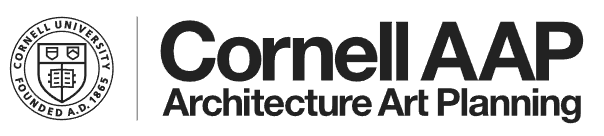
- the difference between dataframe and the geodataframe  
- what means about CRS for Geodataframe  
- How to transfer dataframe into geodataframe
- What the operation difference between `merge` and `spatial join`

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Part I : The difference between Dataframe and the Geodataframe 
The `geodataframe` must inclue a <font color='red'>**geo-type column**</font>, and usually named "geometry"  

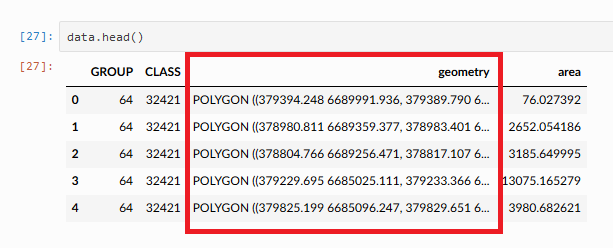

### Examples

Dataframe Example

In [2]:
import pandas as pd

data = {
    'City': ['New York', 'Paris', 'Tokyo', 'Mumbai'],
    'Country': ['USA', 'France', 'Japan', 'India'],
    'Population': [8419000, 2148000, 13929286, 12442373]
}

df = pd.DataFrame(data)
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        4 non-null      object
 1   Country     4 non-null      object
 2   Population  4 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 224.0+ bytes
None


,City,Country,Population
0,New York,USA,8419000
1,Paris,France,2148000
2,Tokyo,Japan,13929286
3,Mumbai,India,12442373


Geodataframe Example

In [3]:
from shapely.geometry import Point

data = {
    'City': ['New York', 'Paris', 'Tokyo', 'Mumbai'],
    'Country': ['USA', 'France', 'Japan', 'India'],
    'Population': [8419000, 2148000, 13929286, 12442373],
    'Geometry': [Point(-74.0060, 40.7128), Point(2.3522, 48.8566), Point(139.6503, 35.6762), Point(72.8777, 19.0760)]
}

gdf = gpd.GeoDataFrame(data, geometry='Geometry')
print(gdf.info())
gdf

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   City        4 non-null      object  
 1   Country     4 non-null      object  
 2   Population  4 non-null      int64   
 3   Geometry    4 non-null      geometry
dtypes: geometry(1), int64(1), object(2)
memory usage: 256.0+ bytes
None


,City,Country,Population,Geometry
0,New York,USA,8419000,POINT (-74.00600 40.71280)
1,Paris,France,2148000,POINT (2.35220 48.85660)
2,Tokyo,Japan,13929286,POINT (139.65030 35.67620)
3,Mumbai,India,12442373,POINT (72.87770 19.07600)


<Axes: >

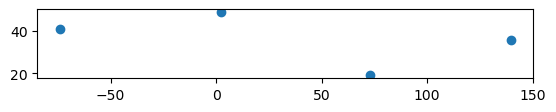

In [4]:
gdf.plot()

<font color='red'>Confusion:</font>  

Sometimes, you will see there is a geometry column in your dataset, but it also show it is a dataframe, if you look carefully in the geometry, you will find it has no `geo-type` in geometry column, that means it also the dataframe

In [5]:
import pandas as pd

data = {
    'City': ['New York', 'Paris', 'Tokyo', 'Mumbai'],
    'Country': ['USA', 'France', 'Japan', 'India'],
    'white_pop': [500000, 400000, 100000, 5000],
    'Geometry': [(-74.0060, 40.7128), (2.3522, 48.8566), (139.6503, 35.6762), (72.8777, 19.0760)]
}

df = pd.DataFrame(data)
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   City       4 non-null      object
 1   Country    4 non-null      object
 2   white_pop  4 non-null      int64 
 3   Geometry   4 non-null      object
dtypes: int64(1), object(3)
memory usage: 256.0+ bytes
None


,City,Country,white_pop,Geometry
0,New York,USA,500000,"(-74.006, 40.7128)"
1,Paris,France,400000,"(2.3522, 48.8566)"
2,Tokyo,Japan,100000,"(139.6503, 35.6762)"
3,Mumbai,India,5000,"(72.8777, 19.076)"


## Part II: What's mean about CRS for Geodataframe and how to give a crs to it

- `Geographic coordinate system(EPSG 4326)`: The range usually limited from `-180` degree to `180` degree for longtitude and `-90` degree ro `90` degree for latitude  

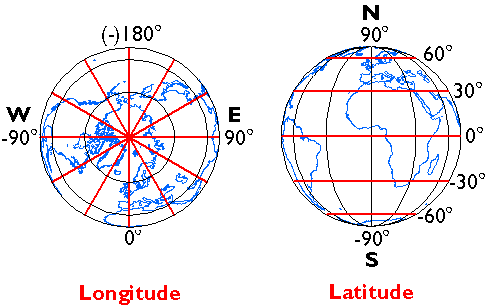

- `Projected coordinate system(EPSG 3857)`: The range ususally very large(distance: meter,mile.etc), and usaually can find `le6`  

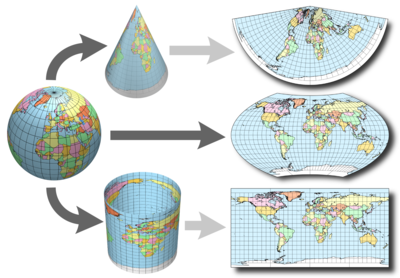


<font color='red'>for geodataframe, it's usually have 3 types of coordinates system(crs)</font>  
- no crs  
- geograpic coordinate system, for ex: 4326
- project coordinate system, for ex: 3857

no crs

In [6]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   City        4 non-null      object  
 1   Country     4 non-null      object  
 2   Population  4 non-null      int64   
 3   Geometry    4 non-null      geometry
dtypes: geometry(1), int64(1), object(2)
memory usage: 256.0+ bytes


In [7]:
gdf.crs

geographic coordinaate system

In [8]:
# For empty crs in GeoDataFrame, We can use '''set_crs'''
gdf =  gdf.set_crs(epsg=4326)

# if there is a crs in GeoDataFrame, we can use '''to_crs'''
# gdf =  gdf.to_crs(epsg=4326)
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

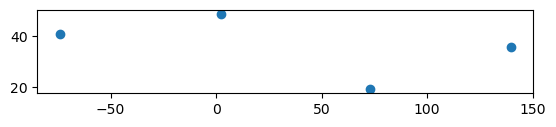

In [9]:
gdf.plot()

project coordinate system

In [10]:
nyc_cbg = gpd.read_file('nyc_cbg')
nyc_cbg.head()

,GISJOIN,COUNTYFP,geometry
0,G36000500001001,005,"POLYGON ((1833819.065 583910.795, 1834122.167 ..."
1,G36000500002001,005,"POLYGON ((1835793.363 586142.846, 1835754.938 ..."
2,G36000500002002,005,"POLYGON ((1835793.363 586142.846, 1835853.186 ..."
3,G36000500002003,005,"POLYGON ((1836035.691 585883.367, 1836065.973 ..."
4,G36000500004001,005,"POLYGON ((1836035.691 585883.367, 1835972.898 ..."


In [11]:
nyc_cbg.crs

<Projected CRS: ESRI:102003>
Name: USA_Contiguous_Albers_Equal_Area_Conic
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<Axes: >

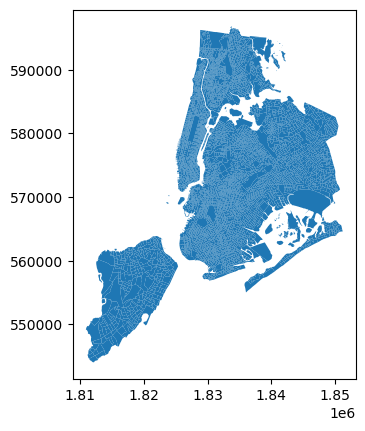

In [12]:
nyc_cbg.plot()

## Part III: How to Transfer Dataframe into Geodataframe

In [13]:
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   City       4 non-null      object
 1   Country    4 non-null      object
 2   white_pop  4 non-null      int64 
 3   Geometry   4 non-null      object
dtypes: int64(1), object(3)
memory usage: 256.0+ bytes
None


,City,Country,white_pop,Geometry
0,New York,USA,500000,"(-74.006, 40.7128)"
1,Paris,France,400000,"(2.3522, 48.8566)"
2,Tokyo,Japan,100000,"(139.6503, 35.6762)"
3,Mumbai,India,5000,"(72.8777, 19.076)"


In [14]:
df['lon'] = df['Geometry'].apply(lambda x: x[0])
df['lat'] = df['Geometry'].apply(lambda x: x[1])
df

,City,Country,white_pop,Geometry,lon,lat
0,New York,USA,500000,"(-74.006, 40.7128)",-74.0060,40.7128
1,Paris,France,400000,"(2.3522, 48.8566)",2.3522,48.8566
2,Tokyo,Japan,100000,"(139.6503, 35.6762)",139.6503,35.6762
3,Mumbai,India,5000,"(72.8777, 19.076)",72.8777,19.0760


In [15]:
df_new = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['lon'], df['lat']), crs='EPSG:4326')
print(df_new.info())
df_new

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   City       4 non-null      object  
 1   Country    4 non-null      object  
 2   white_pop  4 non-null      int64   
 3   Geometry   4 non-null      object  
 4   lon        4 non-null      float64 
 5   lat        4 non-null      float64 
 6   geometry   4 non-null      geometry
dtypes: float64(2), geometry(1), int64(1), object(3)
memory usage: 352.0+ bytes
None


,City,Country,white_pop,Geometry,lon,lat,geometry
0,New York,USA,500000,"(-74.006, 40.7128)",-74.0060,40.7128,POINT (-74.00600 40.71280)
1,Paris,France,400000,"(2.3522, 48.8566)",2.3522,48.8566,POINT (2.35220 48.85660)
2,Tokyo,Japan,100000,"(139.6503, 35.6762)",139.6503,35.6762,POINT (139.65030 35.67620)
3,Mumbai,India,5000,"(72.8777, 19.076)",72.8777,19.0760,POINT (72.87770 19.07600)


In [16]:
df_new.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

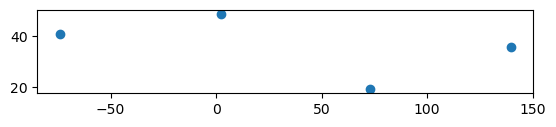

In [17]:
df_new.plot()

## Part IV: What the operation difference between `Merge` and `Spatial Join`  
In my opinion, I think both of them are help us to combine different dataset into together based on different ways,  
- for `merge`: it based on the column name(the columns name don't have to the same)    
the usual expression is: `df = pd.merge(A, B, left_on= 'x',right_on='y', how='left/right/inner/outer')`  

more parameter: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

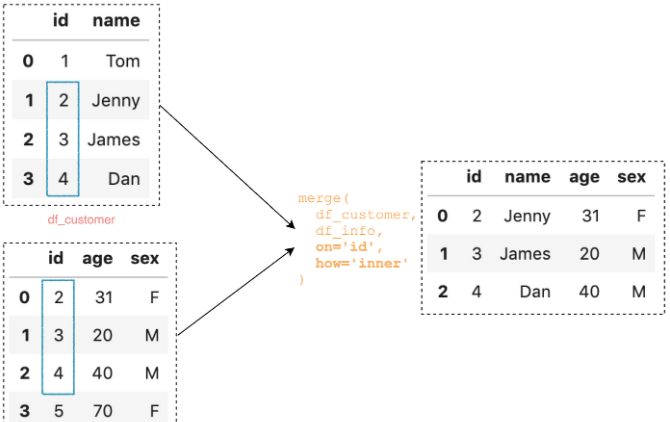
- for `sjoin`: it based on the coordinate system(<font color='red'>please take care about your two geodataframe within the same crs</font>)  
`A = A.to_crs(B.crs)`  
the usual expreesion is: `gdf = gpd.sjoin(left_df, right_df, how='left/right/inner')`

more parameter: https://geopandas.org/en/stable/docs/reference/api/geopandas.sjoin.html

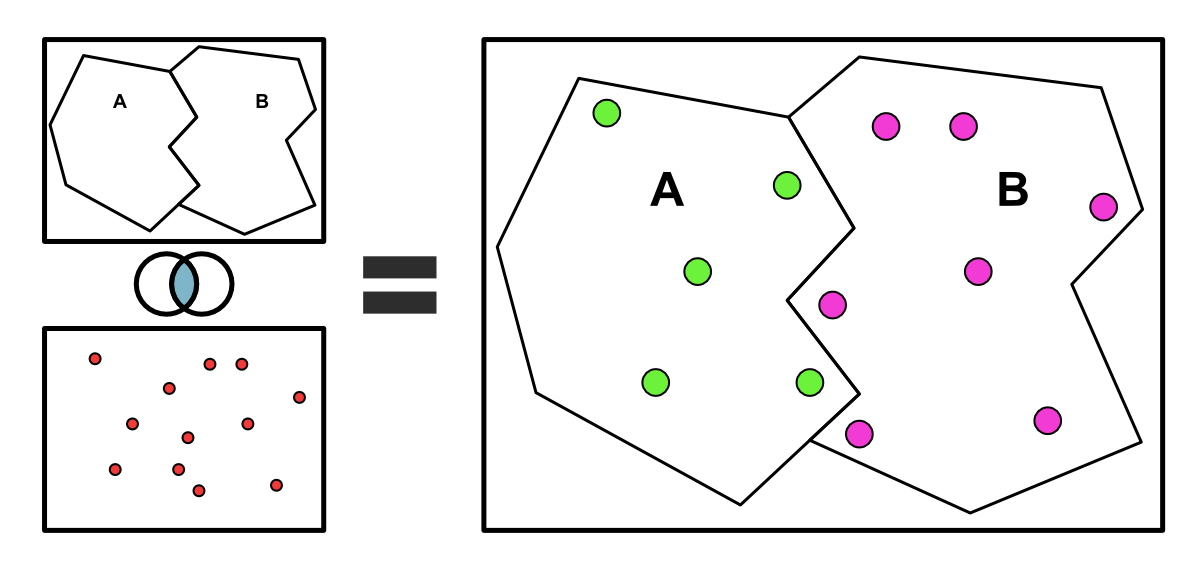

More details please back to the previous lecture material and HW